In [46]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
class SBS():
    def __init__(self, estimator, k_features,scoring=accuracy_score,test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=self.test_size,
        random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
         X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train,X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
                best = np.argmax(scores)
                self.indices_ = subsets[best]
                self.subsets_.append(self.indices_)
                dim -= 1
                self.scores_.append(scores[best])
                self.k_score_ = self.scores_[-1]
        return self

    def transform(self, X):
        return X[:, self.indices_]
    def _calc_score(self, X_train, y_train, X_test, y_test,
        indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [47]:
import pandas as pd 

In [48]:
df = pd.read_csv('weatherAUS.csv')

In [49]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [50]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [51]:
df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'], axis=1,inplace=True)

In [52]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [53]:
df.describe().columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RISK_MM'],
      dtype='object')

In [54]:
df.dropna(subset=['WindGustDir','WindDir9am','WindDir3pm','RainToday'],inplace=True)

In [55]:
df.isnull().sum()

Date                0
Location            0
MinTemp            90
MaxTemp            45
Rainfall            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am      1012
Humidity3pm      1522
Pressure9am      9120
Pressure3pm      9069
Temp9am           343
Temp3pm           795
RainToday           0
RISK_MM             0
RainTomorrow        0
dtype: int64

In [56]:
df.shape

(123710, 20)

In [57]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [58]:
imp_mean.fit(df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']])
SimpleImputer()


SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [59]:
df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']]=imp_mean.transform(df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']])

In [60]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [61]:
df.shape

(123710, 20)

In [62]:
def remove_dash(data):
    data = data.replace('-','')
    return int(data)

In [63]:
df['Date'] = df['Date'].apply(remove_dash)

In [64]:
cols = df.describe().columns

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler = MinMaxScaler()
df[cols]=scaler.fit_transform(df[cols])

In [67]:
df[cols]

,Date,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM
0,0.101483,0.516509,0.523629,0.001632,0.289062,0.211765,0.258824,0.71,0.22,0.449587,0.4800,0.508439,0.522073,0.000000
1,0.101493,0.375000,0.565217,0.000000,0.289062,0.023529,0.235294,0.44,0.25,0.497521,0.4912,0.514768,0.570058,0.000000
2,0.101503,0.504717,0.576560,0.000000,0.304688,0.200000,0.282353,0.38,0.30,0.447934,0.5056,0.594937,0.548944,0.000000
3,0.101513,0.417453,0.620038,0.000000,0.132812,0.105882,0.082353,0.45,0.16,0.613223,0.5712,0.533755,0.612284,0.002695
4,0.101523,0.613208,0.701323,0.002720,0.265625,0.058824,0.211765,0.82,0.33,0.500826,0.4624,0.527426,0.673704,0.000539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,0.999950,0.283019,0.502836,0.000000,0.187500,0.152941,0.129412,0.59,0.27,0.730579,0.7056,0.350211,0.504798,0.000000
142189,0.999960,0.266509,0.533081,0.000000,0.187500,0.129412,0.105882,0.51,0.24,0.728926,0.6912,0.364979,0.533589,0.000000
142190,0.999970,0.285377,0.568998,0.000000,0.117188,0.129412,0.082353,0.56,0.21,0.710744,0.6720,0.381857,0.573896,0.000000
142191,0.999980,0.327830,0.599244,0.000000,0.234375,0.082353,0.082353,0.53,0.24,0.669421,0.6352,0.415612,0.604607,0.000000


In [68]:
cols2 = df.describe(include='O').columns

In [69]:
df[cols2]

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...
142188,Uluru,E,ESE,E,No,No
142189,Uluru,E,SE,ENE,No,No
142190,Uluru,NNW,SE,N,No,No
142191,Uluru,N,SE,WNW,No,No


In [70]:
#binary_mapping = {'Yes':1,'No': 0}
#df['RainTomorrow'] = df['RainToday'].map(binary_mapping)
#df['RainToday'] = df['RainToday'].map(binary_mapping)

In [71]:
from sklearn.preprocessing import LabelEncoder
coder = LabelEncoder()
cols =['WindGustDir', 'WindDir9am', 'WindDir3pm','RainTomorrow','RainToday']
for col in cols:
    df[col]= coder.fit_transform(df[col].values)

In [72]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,0.101483,Albury,0.516509,0.523629,0.001632,13,0.289062,13,14,0.211765,0.258824,0.71,0.22,0.449587,0.4800,0.508439,0.522073,0,0.000000,0
1,0.101493,Albury,0.375000,0.565217,0.000000,14,0.289062,6,15,0.023529,0.235294,0.44,0.25,0.497521,0.4912,0.514768,0.570058,0,0.000000,0
2,0.101503,Albury,0.504717,0.576560,0.000000,15,0.304688,13,15,0.200000,0.282353,0.38,0.30,0.447934,0.5056,0.594937,0.548944,0,0.000000,0
3,0.101513,Albury,0.417453,0.620038,0.000000,4,0.132812,9,0,0.105882,0.082353,0.45,0.16,0.613223,0.5712,0.533755,0.612284,0,0.002695,0
4,0.101523,Albury,0.613208,0.701323,0.002720,13,0.265625,1,7,0.058824,0.211765,0.82,0.33,0.500826,0.4624,0.527426,0.673704,0,0.000539,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,0.999950,Uluru,0.283019,0.502836,0.000000,0,0.187500,2,0,0.152941,0.129412,0.59,0.27,0.730579,0.7056,0.350211,0.504798,0,0.000000,0
142189,0.999960,Uluru,0.266509,0.533081,0.000000,0,0.187500,9,1,0.129412,0.105882,0.51,0.24,0.728926,0.6912,0.364979,0.533589,0,0.000000,0
142190,0.999970,Uluru,0.285377,0.568998,0.000000,6,0.117188,9,3,0.129412,0.082353,0.56,0.21,0.710744,0.6720,0.381857,0.573896,0,0.000000,0
142191,0.999980,Uluru,0.327830,0.599244,0.000000,3,0.234375,9,14,0.082353,0.082353,0.53,0.24,0.669421,0.6352,0.415612,0.604607,0,0.000000,0


In [73]:
dummies = pd .get_dummies(df['Location'])
df.drop(['Location'], axis=1,inplace=True)


In [74]:
df =pd.concat([df,dummies],axis='columns')
df

,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0.101483,0.516509,0.523629,0.001632,13,0.289062,13,14,0.211765,0.258824,...,0,0,0,0,0,0,0,0,0,0
1,0.101493,0.375000,0.565217,0.000000,14,0.289062,6,15,0.023529,0.235294,...,0,0,0,0,0,0,0,0,0,0
2,0.101503,0.504717,0.576560,0.000000,15,0.304688,13,15,0.200000,0.282353,...,0,0,0,0,0,0,0,0,0,0
3,0.101513,0.417453,0.620038,0.000000,4,0.132812,9,0,0.105882,0.082353,...,0,0,0,0,0,0,0,0,0,0
4,0.101523,0.613208,0.701323,0.002720,13,0.265625,1,7,0.058824,0.211765,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,0.999950,0.283019,0.502836,0.000000,0,0.187500,2,0,0.152941,0.129412,...,0,0,1,0,0,0,0,0,0,0
142189,0.999960,0.266509,0.533081,0.000000,0,0.187500,9,1,0.129412,0.105882,...,0,0,1,0,0,0,0,0,0,0
142190,0.999970,0.285377,0.568998,0.000000,6,0.117188,9,3,0.129412,0.082353,...,0,0,1,0,0,0,0,0,0,0
142191,0.999980,0.327830,0.599244,0.000000,3,0.234375,9,14,0.082353,0.082353,...,0,0,1,0,0,0,0,0,0,0


In [75]:
df.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM',
       'RainTomorrow', 'Adelaide', 'Albury', 'AliceSprings', 'BadgerysCreek',
       'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
       'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
       'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport', 'Mildura',
       'Moree', 'MountGambier', 'MountGinini', 'Nhil', 'NorahHead',
       'NorfolkIsland', 'Nuriootpa', 'PearceRAAF', 'Penrith', 'Perth',
       'PerthAirport', 'Portland', 'Richmond', 'Sale', 'SalmonGums', 'Sydney',
       'SydneyAirport', 'Townsville', 'Tuggeranong', 'Uluru', 'WaggaWagga',
       'Walpole', 'Watsonia', 'Williamtown', 'Witchcliffe', 'Wollongong',
       'Woomera'],
      dtype='object')

In [76]:
X = df[['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM', 'Adelaide', 'Albury', 'AliceSprings', 'BadgerysCreek',
       'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
       'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
       'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport', 'Mildura',
       'Moree', 'MountGambier', 'MountGinini', 'Nhil', 'NorahHead',
       'NorfolkIsland', 'Nuriootpa', 'PearceRAAF', 'Penrith', 'Perth',
       'PerthAirport', 'Portland', 'Richmond', 'Sale', 'SalmonGums', 'Sydney',
       'SydneyAirport', 'Townsville', 'Tuggeranong', 'Uluru', 'WaggaWagga',
       'Walpole', 'Watsonia', 'Williamtown', 'Witchcliffe', 'Wollongong',
       'Woomera']]
y = df['RainTomorrow']

In [77]:
df['RainTomorrow'].describe()

count    123710.000000
mean          0.221421
std           0.415205
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: RainTomorrow, dtype: float64

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [79]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression(random_state=0, max_iter=1500)
logis.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [82]:
prd1 = gnb.predict(X_test)
accuracy_score(y_test,prd1)

0.81501091261822

In [80]:
prd = logis.predict(X_test)
accuracy_score(y_test,prd)

0.9039689596637297

In [84]:
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

In [85]:
svm = SVC()
distree =  tree.DecisionTreeClassifier()
neigh = KNeighborsClassifier(n_neighbors=5)

In [ ]:
svm.fit(X_train,y_train)


In [ ]:
distree.fit(X_train,y_train)


In [ ]:
neigh.fit(X_train,y_train)


In [ ]:
pred3 = svm.predict(X_test)
pred4 = distree.predict(X_test)
pred5 = neigh.predict(X_test)


In [36]:
results = logis.predict_proba(X_test)
re

In [37]:
from sklearn.metrics import roc_curve, auc


In [38]:
y_test.shape

(24742,)

In [39]:
results.shape

(24742, 2)

In [40]:
results

array([[0.95069685, 0.04930315],
       [0.98455286, 0.01544714],
       [0.95475779, 0.04524221],
       ...,
       [0.57061958, 0.42938042],
       [0.99599091, 0.00400909],
       [0.22083285, 0.77916715]])

In [41]:
y_score = logis.decision_function(X_test)
y_score.shape

(24742,)

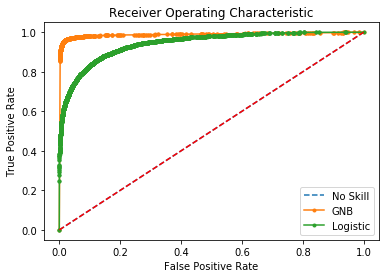

In [83]:
pred_2 = logis.predict(X_test)
pred_1 = gnb.predict(X_test)
probs = logis.predict_proba(X_test)
probs2 = gnb.predict_proba(X_test)
ns_probs = [0 for _ in range(len(y_test))]
preds = probs[:,1]
preds2= probs2[:,1]

lr_fpr, lr_tpr, _ = roc_curve(y_test, preds)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
nb_fpr,nb_tpr, _ = roc_curve(y_test, preds2)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

plt.plot(nb_fpr, nb_tpr, marker='.', label='GNB')

plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.legend()
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()